In [14]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### IMPORT THE BASIC LIBRARIES

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Install and Import the **"librosa"** library...
Librosa is basically used when we work with audio data like in music generation(using LSTM's), Automatic Speech Recognition. It provides the building blocks necessary to create the music information retrieval systems.

This actually helps us to really work well with the sound signals, by using this we can read the sound signals, finds the sample rate, get to know about the channels...

Here we will use this library to preform Exploratory Data Analysis on our dataset

In [16]:
!pip install librosa

In [17]:
import IPython.display as ipd  #library used to display the graphs in python
import librosa
import librosa.display

### Have a look on one sound signalas of a particular file

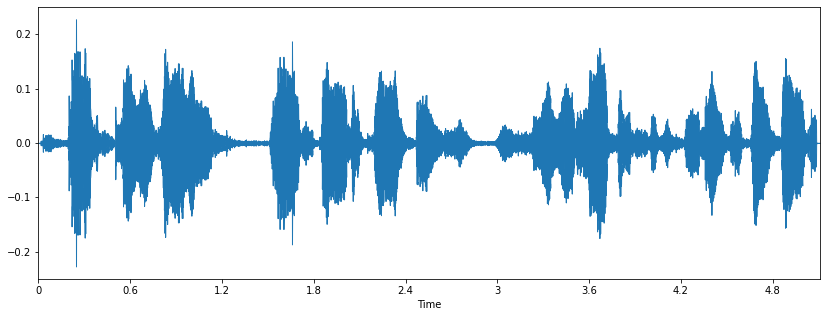

In [20]:
filename = "/content/drive/MyDrive/Dataset/157.wav"

plt.figure(figsize = (14,5))

#load function in librosa returns two parameters i.e data and the sample rate which are needed ahead
data, sample_rate = librosa.load(filename)

#the library display the waveplot or graph of the audio file
librosa.display.waveplot(data, sr = sample_rate)

#audio function of Ipython.display helps to "load the audio" that is in the form of  wav file 
#this by default reads the sample rate through the wave plot
ipd.Audio(filename)

## **SAMPLE RATE..**
 A sample rate defines how many times per second a sound is sampled....usually the avg sample rate is 44.1 KH but here we are getting around 22.05 kH sample rate

Now by default when we are reading the information with librosa then what happpens is that we are reading the signals with sample rate of  22050 i.e whenever we read the sample information through librosa we get a sample rate of 22050 or 22.05kH

In [21]:
sample_rate

22050

## **Why Librosa??**

There is no not a single way to read the audio, we can also use scipy library for that

But then also one goes for librosa library because we know that the dataset contains different audio files which have different sample rate or can have different different channels like mono or stereo, etc...

So when we read a file with ***librosa*** library it tries `normalise` the dataset and provide the data with respect to a single sample rate, and also convert the stereo channels to mono

In [22]:
#librosa also normalize the wave data in alue range from +1 to -1
data

array([ 2.1908805e-05, -5.1910043e-05, -6.1363331e-05, ...,
       -4.5554889e-06,  3.2918319e-06,  0.0000000e+00], dtype=float32)

## Now Import your metadata or the ***train.csv*** file  

In [24]:
mdata = pd.read_csv("/content/drive/MyDrive/Dataset/train.csv")
mdata.head(10)

,filename,emotion
0,18777.mp3,neutral
1,24041.mp3,neutral
2,1621.mp3,joy
3,28883.mp3,neutral
4,14918.mp3,neutral
5,25793.mp3,neutral
6,8382.mp3,joy
7,50666.wav,disgust
8,28471.mp3,surprise
9,1459.mp3,neutral


Check whether the data is imbalanced

In [25]:
mdata['emotion'].value_counts()

neutral     2630
joy          967
surprise     640
anger        596
sadness      344
fear         328
disgust      311
Name: emotion, dtype: int64

### Replace the `.mp3 `extension to `.wav` extension in the filename column of the mdata and save the file for pre-processing

In [49]:
for i in range(len(mdata['filename'])):
  if "mp3" in mdata['filename'][i]:
    mdata['filename'][i] = mdata['filename'][i].replace("mp3","wav")


## Save the file

In [51]:
mdata.to_csv('train_wav.csv')

## IMPORT the **Test File** and do the same for the Test file

In [56]:
test = pd.read_csv("/content/test.csv")
test.head(10)

,filename
0,26199.mp3
1,692.mp3
2,16821.mp3
3,1608.mp3
4,47947.wav
5,26679.mp3
6,45080.wav
7,15385.mp3
8,29210.mp3
9,22481.mp3


In [57]:
for i in range(len(test['filename'])):
  if "mp3" in test['filename'][i]:
    test['filename'][i] = test['filename'][i].replace("mp3","wav")


In [58]:
test

,filename
0,26199.wav
1,692.wav
2,16821.wav
3,1608.wav
4,47947.wav
...,...
2487,16692.wav
2488,29505.wav
2489,5807.wav
2490,43982.wav


## Save the file...

In [60]:
test.to_csv('test_wav.csv')

## **The Data is Ready for the preprocessing.....**